<a href="https://colab.research.google.com/github/RaffaNimir/Python-Models--Machine-Learning/blob/main/Logistic_Regression_Human_Activity_Recognition_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression on the Human Activity Recognition Dataset

This colab project aims to fit a logistic regression or linear regression model to the data source selected in Module #1. The best-fitting model is determined using AIC and/or BIC criteria and K-Fold cross-validation. Additionally, the team attempted to improve model performance by adjusting the data split to 50-50 and implementing Chi-squared tests and PCA. The coefficients of the model are interpreted in the context of the chosen dataset, and a short paragraph is written to describe the findings.


# Basic Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Read in and view the training file
test = pd.read_csv('/content/test.csv')
display(test.head())
test.shape

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


(2947, 563)

In [ ]:
test.dropna(inplace=True)

In [ ]:
#Read in and view the training file
train = pd.read_csv('/content/train.csv')
display(train.head())
train.shape

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


(7352, 563)

In [ ]:
train.dropna(inplace=True)

In [ ]:
# model equation 
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
# Analyze the unique activities
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
# Encoding the Activity column 
# Ordinal Encoding
train['Activity'].unique()
ordinal_encoding = {'STANDING': 1, 'SITTING': 2, 'LAYING': 3, 'WALKING': 4, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 6}
train['Activity'] = train['Activity'].replace(ordinal_encoding)
test['Activity'] = test['Activity'].replace(ordinal_encoding)

In [ ]:
# X, Y for train set 

# X_train = train[:-2]
# X_train.loc[X_train.index.max() + 1, :] = 0
# activity = train.columns[-1]
# Y_train= train[activity]

X_train = train.drop(['subject','Activity'],axis=1)
Y_train= train['Activity']

u = len(X_train)
v = len(Y_train)

print(u,v)

7352 7352


In [ ]:
# X, Y for test set 

# X_test = test[:-2]
# X_test.loc[X_test.index.max() + 1, :] = 0
# X_test.loc[X_test.index.max() + 1, :] = 0
# activity_test = test.columns[-1]
# Y_test= test[activity_test]

X_test = test.drop(['subject','Activity'],axis=1)
Y_test= test['Activity']

x = len(X_test)
y = len(Y_test)

print(x,y)


2947 2947


In [ ]:
# Fitting the model

model.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
# Use the model to predict

Y_pred = model.predict(X_test)

In [ ]:
#Prepare for AIC and BIC
from sklearn.metrics import mean_squared_error

#Y_train_pred = model.predict(X_train)

# Calculate the error
mse = mean_squared_error(Y_test, Y_pred)
display('MSE: {}'.format(mse))

# Calculate number of parameters
num_params = len(model.coef_) + 1
display('# Parameters: {}'.format(num_params))

# Number of samples
n = len(Y_test)
print('# Samples: {}'.format(n))

'MSE: 0.0821174075330845'

'# Parameters: 7'

# Samples: 2947


In [ ]:
from math import log

# Calculate AIC

def calculate_aic(n, mse, num_params):
  aic = n * log(mse) + 2 * num_params
  return aic

display('AIC: {}'.format(calculate_aic(n,mse,num_params)))

# Calculate BIC

def calculate_bic(n, mse, num_params):
 bic = n * log(mse) + num_params * log(n)
 return bic

display('BIC: {}'.format(calculate_bic(n,mse,num_params)))

'AIC: -7352.336691144232'

'BIC: -7310.416890265068'

In [ ]:
# KFold Cross-validation
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, X_train, Y_train, cv=cv, scoring='accuracy')

In [ ]:
# print the score
result

array([0.98912305, 0.98980286, 0.98435374, 0.98163265, 0.98367347])

# Method 1: a) Doing a 70-30 Split & checking fit

Data from test and train were concatenated and then a 70%-30% split was done.

In [ ]:
test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
Q = pd.concat([train, test], ignore_index=True)

In [ ]:
train_df, test_df = train_test_split(Q, test_size=0.3, random_state=42)

In [ ]:
# Z, Q for train set 

Z_train = train_df.drop(['subject','Activity'],axis = 1)
Q_train = train_df['Activity']


n = len(Z_train)
t = len(Q_train)

print(n,t)

7209 7209


In [ ]:
# Z, Q for test set 

Z_test = test_df.drop(['subject','Activity'], axis = 1) 
Q_test= test_df['Activity']


w = len(Z_test)
v = len(Q_test)

print(w,v)


3090 3090


In [ ]:
# Fitting the model
model.fit(Z_train, Q_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
# Use the model to predict

Q_pred = model.predict(Z_test)

In [ ]:
#Prepare for AIC and BIC
from sklearn.metrics import mean_squared_error

#Y_train_pred = model.predict(X_train)

# Calculate the error
mse = mean_squared_error(Q_test, Q_pred)
display('MSE: {}'.format(mse))

# Calculate number of parameters
num_params = len(model.coef_) + 1
display('# Parameters: {}'.format(num_params))

# Number of samples
n = len(Q_test)
print('# Samples: {}'.format(n))

'MSE: 0.04271844660194175'

'# Parameters: 7'

# Samples: 3090


In [ ]:
from math import log

# Calculate AIC

def calculate_aic(n, mse, num_params):
  aic = n * log(mse) + 2 * num_params
  return aic

display('AIC: {}'.format(calculate_aic(n,mse,num_params)))

# Calculate BIC

def calculate_bic(n, mse, num_params):
 bic = n * log(mse) + num_params * log(n)
 return bic

display('BIC: {}'.format(calculate_bic(n,mse,num_params)))

'AIC: -9729.154542173748'

'BIC: -9686.903057584506'

In [ ]:
# KFold Cross-validation
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, Z_train, Q_train, cv=cv, scoring='accuracy')

In [ ]:
# print the score
result

array([0.98335645, 0.98543689, 0.97850208, 0.98613037, 0.9833449 ])

# Method 1 : b) doing a 50-50% test-train split

Data from test and train were concatenated and then a 50%-50% split was done.

In [ ]:
train_ff, test_ff = train_test_split(Q, test_size=0.5, random_state=42)

In [ ]:
# A, B for train set 
A_train = train_ff.drop(['subject','Activity'], axis = 1)
B_train= train_ff['Activity']

a = len(A_train)
b = len(B_train)

print(a,b)

5149 5149


In [ ]:
# A, B for test set 

A_test = test_ff.drop(['subject','Activity'], axis = 1) 
B_test= test_ff['Activity']

w = len(A_test)
v = len(B_test)

print(w,v)


5150 5150


In [ ]:
# Fitting the model
model.fit(A_train, B_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
# Use the model to predict

B_pred = model.predict(A_test)

In [ ]:
#Prepare for AIC and BIC
from sklearn.metrics import mean_squared_error

#Y_train_pred = model.predict(X_train)

# Calculate the error
mse = mean_squared_error(B_test, B_pred)
display('MSE: {}'.format(mse))

# Calculate number of parameters
num_params = len(model.coef_) + 1
display('# Parameters: {}'.format(num_params))

# Number of samples
n = len(B_test)
print('# Samples: {}'.format(n))

'MSE: 0.0374757281553398'

'# Parameters: 7'

# Samples: 5150


In [ ]:
from math import log

# Calculate AIC

def calculate_aic(n, mse, num_params):
  aic = n * log(mse) + 2 * num_params
  return aic

display('AIC: {}'.format(calculate_aic(n,mse,num_params)))

# Calculate BIC

def calculate_bic(n, mse, num_params):
 bic = n * log(mse) + num_params * log(n)
 return bic

display('BIC: {}'.format(calculate_bic(n,mse,num_params)))

'AIC: -16898.918294477415'

'BIC: -16853.09103052181'

In [ ]:
# KFold Cross-validation
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, A_train, B_train, cv=cv, scoring='accuracy')

In [ ]:
# print the score
result

array([0.97961165, 0.98252427, 0.9776699 , 0.98349515, 0.97959184])

# Chi-square Feature Selection

In [ ]:
Q.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656,0.020345,-0.025203
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233,-0.001577,-0.076145
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406,0.001981,-0.064793
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063,-0.061397,0.827087
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511,-0.094486,0.814948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231,0.025003,-0.054100
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614,-0.024190,0.224455
"angle(Z,gravityMean)",0.030656,-0.016233,-0.028406,0.393063,0.425511,0.483424,0.389481,0.424479,0.480032,0.402873,...,0.054008,-0.003242,-0.013130,-0.015380,-0.012549,-0.635231,0.545614,1.000000,-0.067160,0.226778
subject,0.020345,-0.001577,0.001981,-0.061397,-0.094486,-0.036750,-0.059112,-0.094315,-0.042434,-0.058773,...,-0.044378,-0.004619,0.008910,-0.018009,0.008301,0.025003,-0.024190,-0.067160,1.000000,-0.044589


In [ ]:
#define x and y
X = Q.iloc[:, :(Q.shape[1]-1)]
Y = Q.iloc[:, -1]

In [ ]:
from sklearn.feature_selection import chi2

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

chi_square, p_values = chi2(X_scaled, Y)

In [ ]:
p_values_df = pd.DataFrame(p_values, columns=["p_val"], index = X.columns)
p_values_df["chi_square"] = chi_square
p_values_df["pvalue_to_3_decimal_places"] = round(p_values_df["p_val"], 3)

ind_bin = [0, 0.05, 1]
ind_label = ["Dependence (Reject H0:No dependence)", "Independence (Fail to Reject H0: No dependence)"]
p_values_df["conclusion"] = pd.cut(p_values_df["p_val"], bins= ind_bin, labels=ind_label)

p_values_df

,p_val,chi_square,pvalue_to_3_decimal_places,conclusion
tBodyAcc-mean()-X,9.986387e-01,0.238781,0.999,Independence (Fail to Reject H0: No dependence)
tBodyAcc-mean()-Y,9.999065e-01,0.079965,1.000,Independence (Fail to Reject H0: No dependence)
tBodyAcc-mean()-Z,9.995984e-01,0.144583,1.000,Independence (Fail to Reject H0: No dependence)
tBodyAcc-std()-X,0.000000e+00,2331.110364,0.000,NaN
tBodyAcc-std()-Y,0.000000e+00,2313.787203,0.000,NaN
...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",2.743237e-01,6.342277,0.274,Independence (Fail to Reject H0: No dependence)
"angle(X,gravityMean)",0.000000e+00,2483.276038,0.000,NaN
"angle(Y,gravityMean)",4.852628e-66,315.414035,0.000,Dependence (Reject H0:No dependence)
"angle(Z,gravityMean)",6.136118e-41,198.436350,0.000,Dependence (Reject H0:No dependence)


In [ ]:
len(Q.columns)

563

excluding the features that fail to reject the null hypothesis (p-value >= alpha) and selecting the features that reject the null hypothesis (p-value < alpha) for inclusion in the final feature set, Exculding the NaN features.


In [ ]:
filtered_df = p_values_df[p_values_df['conclusion'] == 'Independence (Fail to Reject H0: No dependence)']
filtered_df

,p_val,chi_square,pvalue_to_3_decimal_places,conclusion
tBodyAcc-mean()-X,0.998639,0.238781,0.999,Independence (Fail to Reject H0: No dependence)
tBodyAcc-mean()-Y,0.999907,0.079965,1.000,Independence (Fail to Reject H0: No dependence)
tBodyAcc-mean()-Z,0.999598,0.144583,1.000,Independence (Fail to Reject H0: No dependence)
"tBodyAcc-arCoeff()-Y,3",0.160996,7.914765,0.161,Independence (Fail to Reject H0: No dependence)
"tBodyAcc-arCoeff()-Y,4",0.323563,5.825572,0.324,Independence (Fail to Reject H0: No dependence)
tBodyAccJerk-mean()-X,0.999816,0.105230,1.000,Independence (Fail to Reject H0: No dependence)
tBodyAccJerk-mean()-Y,0.999943,0.065627,1.000,Independence (Fail to Reject H0: No dependence)
tBodyAccJerk-mean()-Z,0.999996,0.022104,1.000,Independence (Fail to Reject H0: No dependence)
"tBodyAccJerk-arCoeff()-X,2",0.508736,4.288021,0.509,Independence (Fail to Reject H0: No dependence)
"tBodyAccJerk-arCoeff()-Y,4",0.166096,7.825887,0.166,Independence (Fail to Reject H0: No dependence)


In [ ]:
excluded_features =  filtered_df.index.tolist()

In [ ]:
print(excluded_features)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-arCoeff()-X,2', 'tBodyAccJerk-arCoeff()-Y,4', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-arCoeff()-X,3', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-arCoeff()-X,4', 'tBodyGyroJerk-arCoeff()-Y,3', 'tBodyGyroJerk-arCoeff()-Y,4', 'tBodyGyroJerk-correlation()-X,Z', 'tBodyAccJerkMag-arCoeff()3', 'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4', 'tBodyGyroJerkMag-arCoeff()3', 'fBodyBodyAccJerkMag-maxInds', 'fBodyBodyGyroJerkMag-meanFreq()', 'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)', 'subject']


In [ ]:
# R, S for train set 
R_train = train.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-arCoeff()-X,2', 'tBodyAccJerk-arCoeff()-Y,4', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-arCoeff()-X,3', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-arCoeff()-X,4', 'tBodyGyroJerk-arCoeff()-Y,3', 'tBodyGyroJerk-arCoeff()-Y,4', 'tBodyGyroJerk-correlation()-X,Z', 'tBodyAccJerkMag-arCoeff()3', 'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4', 'tBodyGyroJerkMag-arCoeff()3', 'fBodyBodyAccJerkMag-maxInds', 'fBodyBodyGyroJerkMag-meanFreq()', 'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)','subject','Activity'], axis = 1)
S_train= train['Activity']

r = len(R_train)
s = len(S_train)

print(r,s)

7352 7352


In [ ]:
# C, D for test set 

R_test = test.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-arCoeff()-X,2', 'tBodyAccJerk-arCoeff()-Y,4', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-arCoeff()-X,3', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-arCoeff()-X,4', 'tBodyGyroJerk-arCoeff()-Y,3', 'tBodyGyroJerk-arCoeff()-Y,4', 'tBodyGyroJerk-correlation()-X,Z', 'tBodyAccJerkMag-arCoeff()3', 'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4', 'tBodyGyroJerkMag-arCoeff()3', 'fBodyBodyAccJerkMag-maxInds', 'fBodyBodyGyroJerkMag-meanFreq()', 'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)','subject','Activity'], axis = 1) 
S_test= test['Activity']

c = len(R_test)
d = len(S_test)

print(c,d)

2947 2947


In [ ]:
# Fitting the model
model.fit(R_train, S_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
# Use the model to predict

S_pred = model.predict(R_test)

In [ ]:
#Prepare for AIC and BIC
from sklearn.metrics import mean_squared_error

#Y_train_pred = model.predict(X_train)

# Calculate the error
mse = mean_squared_error(S_test, S_pred)
display('MSE: {}'.format(mse))

# Calculate number of parameters
num_params = len(model.coef_) + 1
display('# Parameters: {}'.format(num_params))

# Number of samples
n = len(S_test)
print('# Samples: {}'.format(n))

'MSE: 0.07668815744825246'

'# Parameters: 7'

# Samples: 2947


In [ ]:
from math import log

# Calculate AIC

def calculate_aic(n, mse, num_params):
  aic = n * log(mse) + 2 * num_params
  return aic

display('AIC: {}'.format(calculate_aic(n,mse,num_params)))

# Calculate BIC

def calculate_bic(n, mse, num_params):
 bic = n * log(mse) + num_params * log(n)
 return bic

display('BIC: {}'.format(calculate_bic(n,mse,num_params)))

'AIC: -7553.91952727256'

'BIC: -7511.9997263933965'

In [ ]:
# KFold Cross-validation
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, R_train, S_train, cv=cv, scoring='accuracy')

In [ ]:
# print the score
result

array([0.98844324, 0.98640381, 0.98435374, 0.98095238, 0.9829932 ])

Principal Component Analysis

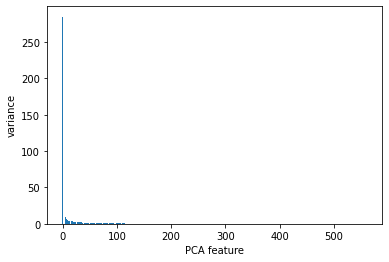

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Save traing and test data to new variables
pX_train = X_train
py_train = Y_train

pX_test = X_test
py_test = Y_test

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(pX_train)

# Plot the explained variances
features = range(pca.n_components_)
variance = pca.explained_variance_
plt.bar(features,variance)
plt.xlabel('PCA feature')
plt.ylabel('variance')
# plt.xticks(features)
plt.show()


In [ ]:
#Rescale data
x=StandardScaler().fit_transform(pX_train)

# Perform dimension reduction with PCA
pca = PCA(n_components = 20)
data = pca.fit_transform(x)


In [ ]:
# Number of components
n_pcs= pca.components_.shape[0]

# Get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = pX_train.columns

# Get the feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# Build the dataframe
df = pd.DataFrame(dic.items())

#Inspect dataframe
df

,0,1
0,PC0,fBodyAcc-sma()
1,PC1,fBodyAcc-meanFreq()-Z
2,PC2,tGravityAcc-energy()-X
3,PC3,tGravityAcc-max()-Z
4,PC4,"angle(X,gravityMean)"
5,PC5,fBodyBodyGyroJerkMag-skewness()
6,PC6,fBodyGyro-meanFreq()-Y
7,PC7,"tBodyAcc-arCoeff()-Y,4"
8,PC8,fBodyGyro-skewness()-Z
9,PC9,"tBodyGyroJerk-arCoeff()-Y,3"


In [ ]:
features = df.values[:,1]
features

array(['fBodyAcc-sma()', 'fBodyAcc-meanFreq()-Z',
       'tGravityAcc-energy()-X', 'tGravityAcc-max()-Z',
       'angle(X,gravityMean)', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyGyro-meanFreq()-Y', 'tBodyAcc-arCoeff()-Y,4',
       'fBodyGyro-skewness()-Z', 'tBodyGyroJerk-arCoeff()-Y,3',
       'fBodyGyro-bandsEnergy()-49,64.2', 'tBodyAcc-arCoeff()-Y,3',
       'fBodyGyro-bandsEnergy()-57,64', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyGyro-mean()-X', 'tBodyAcc-arCoeff()-X,3',
       'fBodyAcc-bandsEnergy()-49,64.1', 'tBodyAccJerk-arCoeff()-Y,3',
       'tBodyGyro-mean()-X', 'tBodyGyro-arCoeff()-X,3'], dtype=object)

In [ ]:
# Save the PCA data into a dataframe
principal_data=pd.DataFrame(data)
principal_data.columns = features
principal_data.head()

,fBodyAcc-sma(),fBodyAcc-meanFreq()-Z,tGravityAcc-energy()-X,tGravityAcc-max()-Z,"angle(X,gravityMean)",fBodyBodyGyroJerkMag-skewness(),fBodyGyro-meanFreq()-Y,"tBodyAcc-arCoeff()-Y,4",fBodyGyro-skewness()-Z,"tBodyGyroJerk-arCoeff()-Y,3","fBodyGyro-bandsEnergy()-49,64.2","tBodyAcc-arCoeff()-Y,3","fBodyGyro-bandsEnergy()-57,64","tBodyAcc-arCoeff()-Z,3",tBodyGyro-mean()-X,"tBodyAcc-arCoeff()-X,3","fBodyAcc-bandsEnergy()-49,64.1","tBodyAccJerk-arCoeff()-Y,3",tBodyGyro-mean()-X,"tBodyGyro-arCoeff()-X,3"
0,-16.138544,2.152024,3.144780,-0.272463,6.798948,-4.249460,2.936821,-4.905115,-0.776782,-3.625422,0.068919,0.880020,1.281008,-0.946395,2.787476,0.871821,-1.728667,-3.976276,2.209642,-0.101777
1,-15.296194,1.387144,-0.682221,2.813676,4.266184,-2.055680,0.011368,-1.846094,0.494016,-0.180512,-1.162251,0.002154,0.031539,0.824470,0.431759,-1.320870,0.682393,-0.047291,0.980639,0.092829
2,-15.137019,2.473351,-1.756640,3.717973,4.181566,-1.357507,0.073049,-1.388322,0.540348,-0.671489,-0.671649,-0.377932,0.453761,-1.426407,0.868575,-0.533948,-0.256420,0.920126,0.160842,-0.108331
3,-15.350884,3.915681,-1.790322,2.567521,3.205817,-0.942892,0.530710,-1.832350,1.069545,-1.497379,-0.131845,-0.279067,-1.361326,-0.270433,-0.607414,1.434061,0.016264,-0.318032,-1.398067,-0.591041
4,-15.544814,4.598737,-2.188582,2.897579,3.080154,-1.061469,-1.048567,-0.816891,0.600499,1.118532,-2.222990,-2.480239,-0.588134,1.117264,-0.597630,-0.024705,2.226537,1.340608,-1.858709,0.405567


In [ ]:
pX_test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [ ]:

# Scale X_test
scaled_X_test = scaler.transform(pX_test)
scaled_X_test =pd.DataFrame(scaled_X_test)


In [ ]:
# ASSUMPTION: The scaled columns are the same as the original columns
scaled_X_test.columns = pX_test.columns

#Subset X_test
feature_list = features.tolist()
subset_X_test = scaled_X_test[feature_list]

In [ ]:
# #Fix sample error issue
# principal_data.loc[principal_data.index.max() + 1, :] = 0
# subset_X_test.loc[subset_X_test.index.max() + 1, :] = 0

In [ ]:
# Perform logistic regression
logistic=LogisticRegression(multi_class='multinomial', solver='newton-cg')
logistic.fit(principal_data,py_train)
_pca_y_pred = logistic.predict(subset_X_test)
score = logistic.score(subset_X_test,py_test)

In [ ]:
score

0.22361723786901935